In [1]:
import numpy as np
import pandas as pd
import json


In [ ]:
feb11_pd=pd.read_json("processed211.json", orient='records', lines=True).set_index('id')
train_pd=feb11_pd
#may11_pd=pd.read_json("processed_11-05.json", orient='records', lines=True).set_index('id')
#jul11_pd=pd.read_json("processed_11-07.json", orient='records', lines=True).set_index('id')
#aug11_pd=pd.read_json("processed_11-08.json", orient='records', lines=True).set_index('id')

#pd_list=[feb11_pd,may11_pd,jul11_pd,aug11_pd]

#train_pd=pd.concat(pd_list)

train_pd

In [ ]:
distributed_pd=train_pd.reset_index()
distributed_pd['i']=distributed_pd.loc[:,'vectors'].apply(lambda x: x['indices'])
distributed_pd['v']=distributed_pd.loc[:,'vectors'].apply(lambda x: x['values'])

distributed_pd

In [ ]:
from scipy import sparse

V=distributed_pd.loc[:,'v']
I=distributed_pd.index
J=distributed_pd.loc[:,'i']

n=len(distributed_pd)
d=8345


In [ ]:
from scipy.sparse import dok_matrix

A = dok_matrix((n,d))
for i in range(n):
    row_values=V[i]
    row_index=J[i]    
    for j in range(len(row_values)):
        value=row_values[j]
        index=row_index[j]
        A[i,index]=value
A

In [9]:
from sklearn.manifold import TSNE

model=TSNE(n_iter=1000,verbose=2)

#twoD=model.fit_transform(A.toarray())

In [21]:
med=pd.read_csv('medoutput.csv')
med

med_nums=med.iloc[:,3:]

med

,subreddit,count(1),sum(wordcount),ingestfreq,causefreq,insightfreq,cogmechfreq,sadfreq,inhibfreq,certainfreq,...,prepsfreq,adverbfreq,negatefreq,conjfreq,homefreq,leisurefreq,achievefreq,workfreq,religfreq,moneyfreq
0,2007scape,1010,259492,0.001970,0.0241,0.019900,0.173,0.004580,0.006850,0.01380,...,0.1330,0.04620,0.01780,0.0618,0.001550,0.01620,0.02460,0.01530,0.003010,0.01190
1,3d6,107,30975,0.003160,0.0192,0.020600,0.169,0.006130,0.006880,0.01110,...,0.1300,0.04100,0.01130,0.0723,0.000775,0.01110,0.02970,0.01270,0.004160,0.00513
2,3Dprinting,410,74790,0.001200,0.0212,0.022000,0.178,0.002620,0.005510,0.01200,...,0.1320,0.04730,0.01770,0.0678,0.007130,0.00555,0.02090,0.01450,0.000441,0.00711
3,40kLore,218,76095,0.002300,0.0165,0.022400,0.165,0.005180,0.008490,0.01380,...,0.1430,0.04460,0.01390,0.0665,0.002100,0.01020,0.01930,0.01720,0.006610,0.00311
4,90DayFiance,182,61542,0.005720,0.0153,0.021700,0.163,0.002790,0.004520,0.01320,...,0.1270,0.04490,0.01640,0.0605,0.006080,0.01970,0.01180,0.01070,0.001950,0.00806
5,ableton,114,19752,0.000861,0.0305,0.026100,0.198,0.001620,0.007090,0.01350,...,0.1350,0.04980,0.01560,0.0711,0.001670,0.01920,0.03460,0.02130,0.002480,0.00739
6,ABraThatFits,218,54497,0.001340,0.0142,0.025600,0.170,0.002290,0.005430,0.01250,...,0.1200,0.05500,0.01630,0.0709,0.001560,0.00868,0.01830,0.00912,0.000587,0.00714
7,Accounting,476,91228,0.000976,0.0161,0.028900,0.174,0.002580,0.004420,0.01180,...,0.1410,0.04420,0.01490,0.0647,0.002020,0.00516,0.02480,0.06810,0.000559,0.03730
8,ACPocketCamp,107,22904,0.001920,0.0160,0.020500,0.160,0.002180,0.005410,0.01500,...,0.1300,0.04750,0.01240,0.0639,0.004100,0.02130,0.02070,0.01580,0.002840,0.01290
9,acting,119,24506,0.000775,0.0166,0.025300,0.181,0.002610,0.003430,0.01440,...,0.1370,0.05460,0.01700,0.0739,0.002490,0.02090,0.01880,0.03720,0.001630,0.01200


In [10]:
twod=model.fit_transform(med_nums)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1224 samples in 0.002s...
[t-SNE] Computed neighbors for 1224 samples in 0.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1224
[t-SNE] Computed conditional probabilities for sample 1224 / 1224
[t-SNE] Mean sigma: 0.023222
[t-SNE] Computed conditional probabilities in 0.067s
[t-SNE] Iteration 50: error = 69.6367722, gradient norm = 0.1835524 (50 iterations in 1.428s)
[t-SNE] Iteration 100: error = 65.6768417, gradient norm = 0.1776154 (50 iterations in 1.233s)
[t-SNE] Iteration 150: error = 65.6209946, gradient norm = 0.1600277 (50 iterations in 1.306s)
[t-SNE] Iteration 200: error = 65.6119919, gradient norm = 0.1519854 (50 iterations in 1.304s)
[t-SNE] Iteration 250: error = 65.1871033, gradient norm = 0.1500204 (50 iterations in 1.296s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.187103
[t-SNE] Iteration 300: error = 0.9719610, gradient norm = 0.0006947 (50 iterations in 1.225s)

In [17]:
twod.T

array([[  1.6999727,   2.4187367,  24.713804 , ..., -21.347095 ,
         -6.2152567, -11.234065 ],
       [ 14.984086 ,  32.297604 ,  -4.0792375, ...,  11.209228 ,
         23.408749 ,  35.431896 ]], dtype=float32)

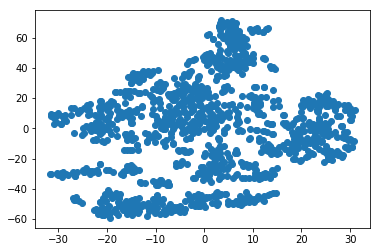

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(twod.T[0],twod.T[1])